<a href="https://colab.research.google.com/github/venkatesh-r96/Structured-Data-Assignment/blob/main/001_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Structured Data Assignment**

**Brief Description of the Dataset** -
The dataset in question contains a comprehensive collection of electronic
health records belonging to patients who have been diagnosed with a specific
disease. These health records comprise a detailed log of every aspect of the
patients' medical history, including all diagnoses, symptoms, prescribed drug
treatments, and medical tests that they have undergone. Each row represents a
healthcare record/medical event for a patient and it includes a timestamp for each
entry/event, thereby allowing for a chronological view of the patient's medical history

# Problem 1

The objective in this assignment is to develop a predictive model which will predict
whether a patient will be eligible for “Target Drug” or not in next 30 days. Knowing
if the patient is eligible or not will help physician treating the patient make informed
decision on the which treatments to give.


In [ ]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
df = pd.read_parquet("/content/drive/MyDrive/Data Science/Structured_Data_Assignment/train.parquet", engine="auto")
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [ ]:
# make sure all datas in correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [ ]:
# checking null values
df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
# checking duplicated values
df.duplicated()

0           False
1           False
3           False
4           False
8           False
            ...  
29080886    False
29080897    False
29080900    False
29080903    False
29080911    False
Length: 3220868, dtype: bool

In [ ]:
df.duplicated().sum()

35571

In [ ]:
duplicate_values = df[df.duplicated()]
duplicate_values

,Patient-Uid,Date,Incident
3681,a0dca226-1c7c-11ec-9eef-16262ee38c7f,2020-07-24,DRUG_TYPE_6
4131,a0dcc4e6-1c7c-11ec-bbd2-16262ee38c7f,2015-10-13,DRUG_TYPE_5
6025,a0dd0d0e-1c7c-11ec-9bd5-16262ee38c7f,2015-06-18,PRIMARY_DIAGNOSIS
10028,a0de5949-1c7c-11ec-b2e8-16262ee38c7f,2019-08-22,DRUG_TYPE_8
11082,a0ddc121-1c7c-11ec-b9ca-16262ee38c7f,2018-04-03,DRUG_TYPE_7
...,...,...,...
29065316,a0ef0c1e-1c7c-11ec-a241-16262ee38c7f,2015-12-30,DRUG_TYPE_7
29065731,a0eee1ee-1c7c-11ec-ba37-16262ee38c7f,2019-07-17,DRUG_TYPE_7
29066103,a0f08b3a-1c7c-11ec-bfcf-16262ee38c7f,2017-06-13,DRUG_TYPE_7
29072425,a0efd1e7-1c7c-11ec-94ed-16262ee38c7f,2018-07-24,DRUG_TYPE_7


In [ ]:
duplicate_values['Incident'].value_counts()

DRUG_TYPE_6          12318
DRUG_TYPE_7           7543
PRIMARY_DIAGNOSIS     7023
DRUG_TYPE_11          2699
DRUG_TYPE_5           1570
DRUG_TYPE_8           1360
DRUG_TYPE_0           1124
DRUG_TYPE_3           1061
DRUG_TYPE_2            638
DRUG_TYPE_1            101
DRUG_TYPE_13            51
SYMPTOM_TYPE_29         40
DRUG_TYPE_16            18
DRUG_TYPE_10            14
DRUG_TYPE_12            11
Name: Incident, dtype: int64

In [ ]:
# checking how the duplicate values are there
duplicate_values[duplicate_values['Incident']=='DRUG_TYPE_12']

,Patient-Uid,Date,Incident
117553,a0dd8fcf-1c7c-11ec-a673-16262ee38c7f,2015-07-16,DRUG_TYPE_12
681861,a0e15f0b-1c7c-11ec-b996-16262ee38c7f,2016-05-11,DRUG_TYPE_12
843588,a0e23296-1c7c-11ec-8aeb-16262ee38c7f,2020-01-02,DRUG_TYPE_12
942711,a0e15f0b-1c7c-11ec-b996-16262ee38c7f,2016-05-11,DRUG_TYPE_12
2217046,a0e11faa-1c7c-11ec-bac1-16262ee38c7f,2018-05-11,DRUG_TYPE_12
20518822,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2018-05-25,DRUG_TYPE_12
22074249,a0eee7bd-1c7c-11ec-a30b-16262ee38c7f,2018-05-02,DRUG_TYPE_12
23118627,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2016-09-21,DRUG_TYPE_12
23166140,a0eee7bd-1c7c-11ec-a30b-16262ee38c7f,2018-05-02,DRUG_TYPE_12
23941900,a0ef1765-1c7c-11ec-a575-16262ee38c7f,2016-09-21,DRUG_TYPE_12


Cleaning the data

In [ ]:
# deleting the duplicate values
df.drop_duplicates()
df.shape

(3220868, 3)

Exploratory data analysis (EDA)

In [ ]:
df['Patient-Uid'].value_counts()

a0ddfd2c-1c7c-11ec-876d-16262ee38c7f    1645
a0ea618f-1c7c-11ec-93fb-16262ee38c7f    1320
a0e553c4-1c7c-11ec-83f1-16262ee38c7f    1163
a0df4809-1c7c-11ec-be0b-16262ee38c7f    1099
a0ec2afe-1c7c-11ec-befd-16262ee38c7f    1075
                                        ... 
a0ecc127-1c7c-11ec-92b5-16262ee38c7f      31
a0eb794b-1c7c-11ec-92d7-16262ee38c7f      30
a0f02cd8-1c7c-11ec-96a0-16262ee38c7f      28
a0efac48-1c7c-11ec-9daa-16262ee38c7f      25
a0f0d0b5-1c7c-11ec-9901-16262ee38c7f      24
Name: Patient-Uid, Length: 27033, dtype: int64

In [ ]:
df['Date'].value_counts()

2019-05-21    3678
2019-05-22    3387
2019-03-05    3198
2019-05-14    3169
2019-03-12    3034
              ... 
2018-02-28     312
2017-02-28     286
2020-02-29     285
2016-01-29     273
2016-02-29     259
Name: Date, Length: 1977, dtype: int64

In [ ]:
df['Incident'].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [ ]:
Incident_counts = df['Incident'].value_counts()
Incident_counts

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           57510
DRUG_TYPE_11          48118
SYMPTOM_TYPE_0        46078
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20925
DRUG_TYPE_14          17306
DRUG_TYPE_13          12372
DRUG_TYPE_12           9551
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5950
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

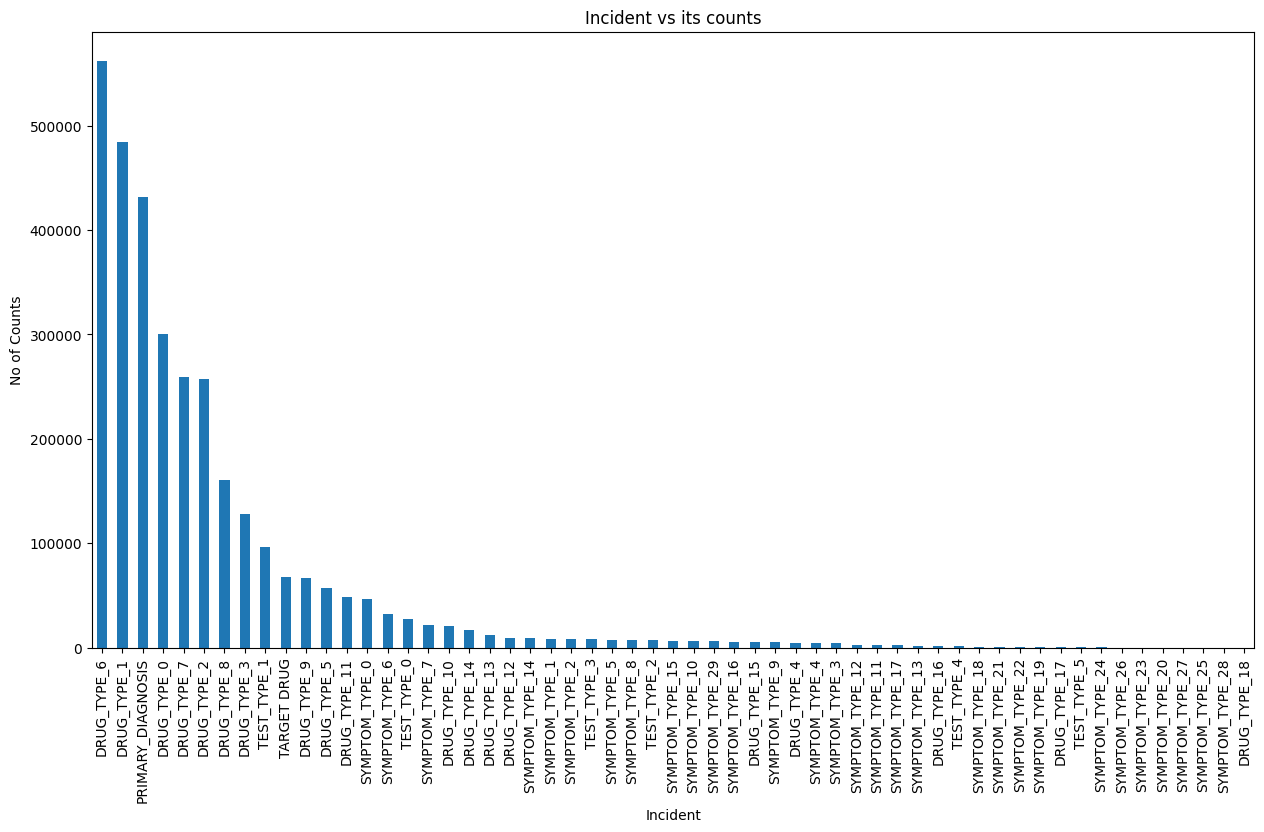

In [ ]:
# Creating the bar plot using incident counts
Incident_counts.plot(kind = 'bar', figsize=(15,8))
plt.xlabel("Incident")
plt.ylabel("No of Counts")
plt.title("Incident vs its counts")
plt.show()

This plot is showing DRUG_TYPE_6 has more number of counts

Feature Engineering

In [ ]:
# Extract the month and year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Group
Incident_month_year = df.groupby(['year', 'month', 'Incident']).size().reset_index(name='Count')

In [ ]:
Incident_month_year

,year,month,Incident,Count
0,2015,4,DRUG_TYPE_0,2079
1,2015,4,DRUG_TYPE_1,4826
2,2015,4,DRUG_TYPE_11,644
3,2015,4,DRUG_TYPE_12,106
4,2015,4,DRUG_TYPE_13,67
...,...,...,...,...
3279,2020,9,TEST_TYPE_0,23
3280,2020,9,TEST_TYPE_1,132
3281,2020,9,TEST_TYPE_2,2
3282,2020,9,TEST_TYPE_3,6


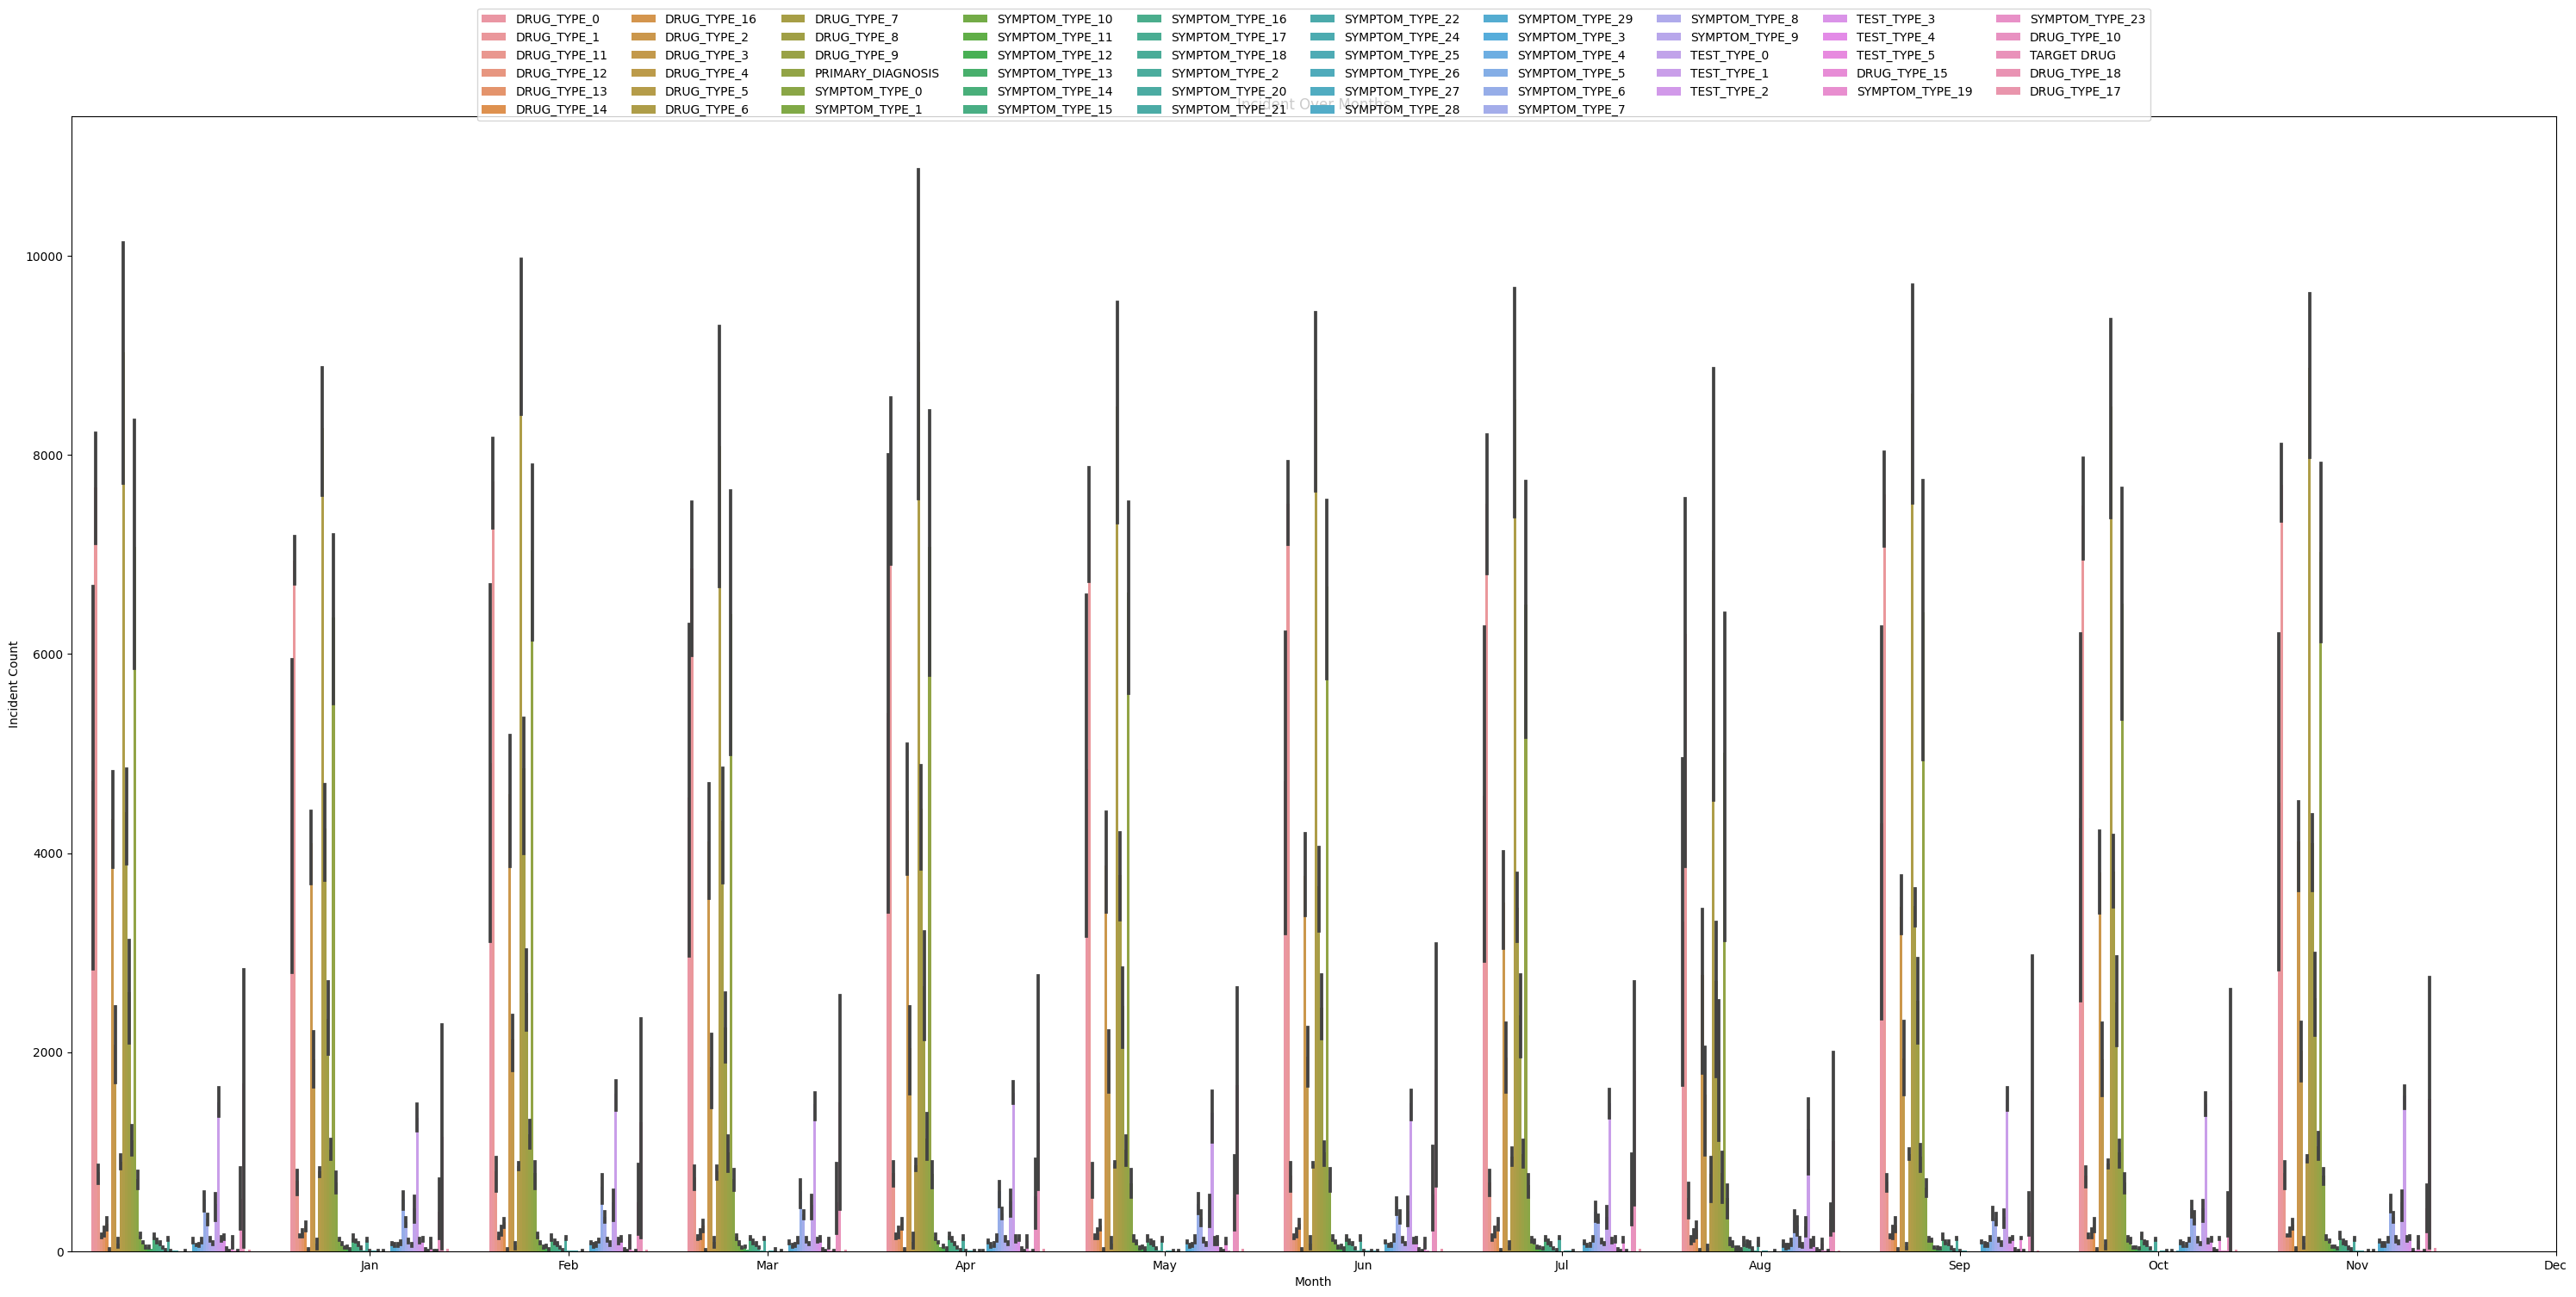

In [ ]:
# Creating the bar plot with month and incident
plt.figure(figsize=(30,15))
ax=sns.barplot(data = Incident_month_year, x='month', y='Count', hue='Incident')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=10)
plt.title('Incident Over Months')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

This plot is showing that all the 5 years, more patients are taken drug in  March month

<Figure size 1500x1000 with 0 Axes>

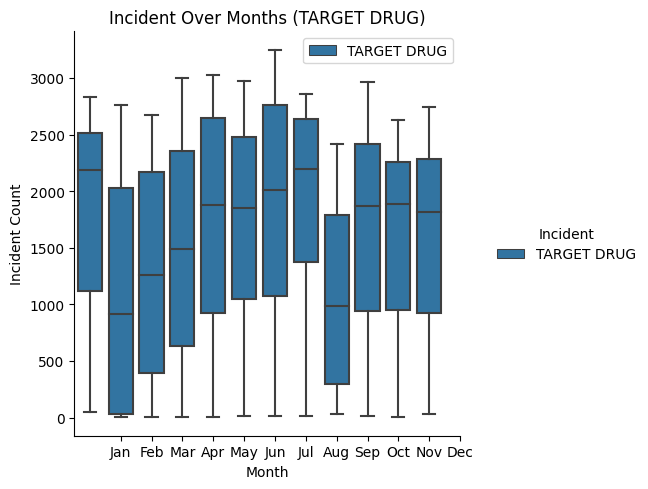

In [ ]:
# Creating the bar plot with month and incident
plt.figure(figsize=(15,10))
ax=sns.catplot(data=Incident_month_year[Incident_month_year['Incident'] == 'TARGET DRUG'],x='month', y='Count', hue='Incident', kind = 'box')
plt.title('Incident Over Months (TARGET DRUG)')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.tight_layout()
plt.legend(loc = 'upper right')
plt.show()

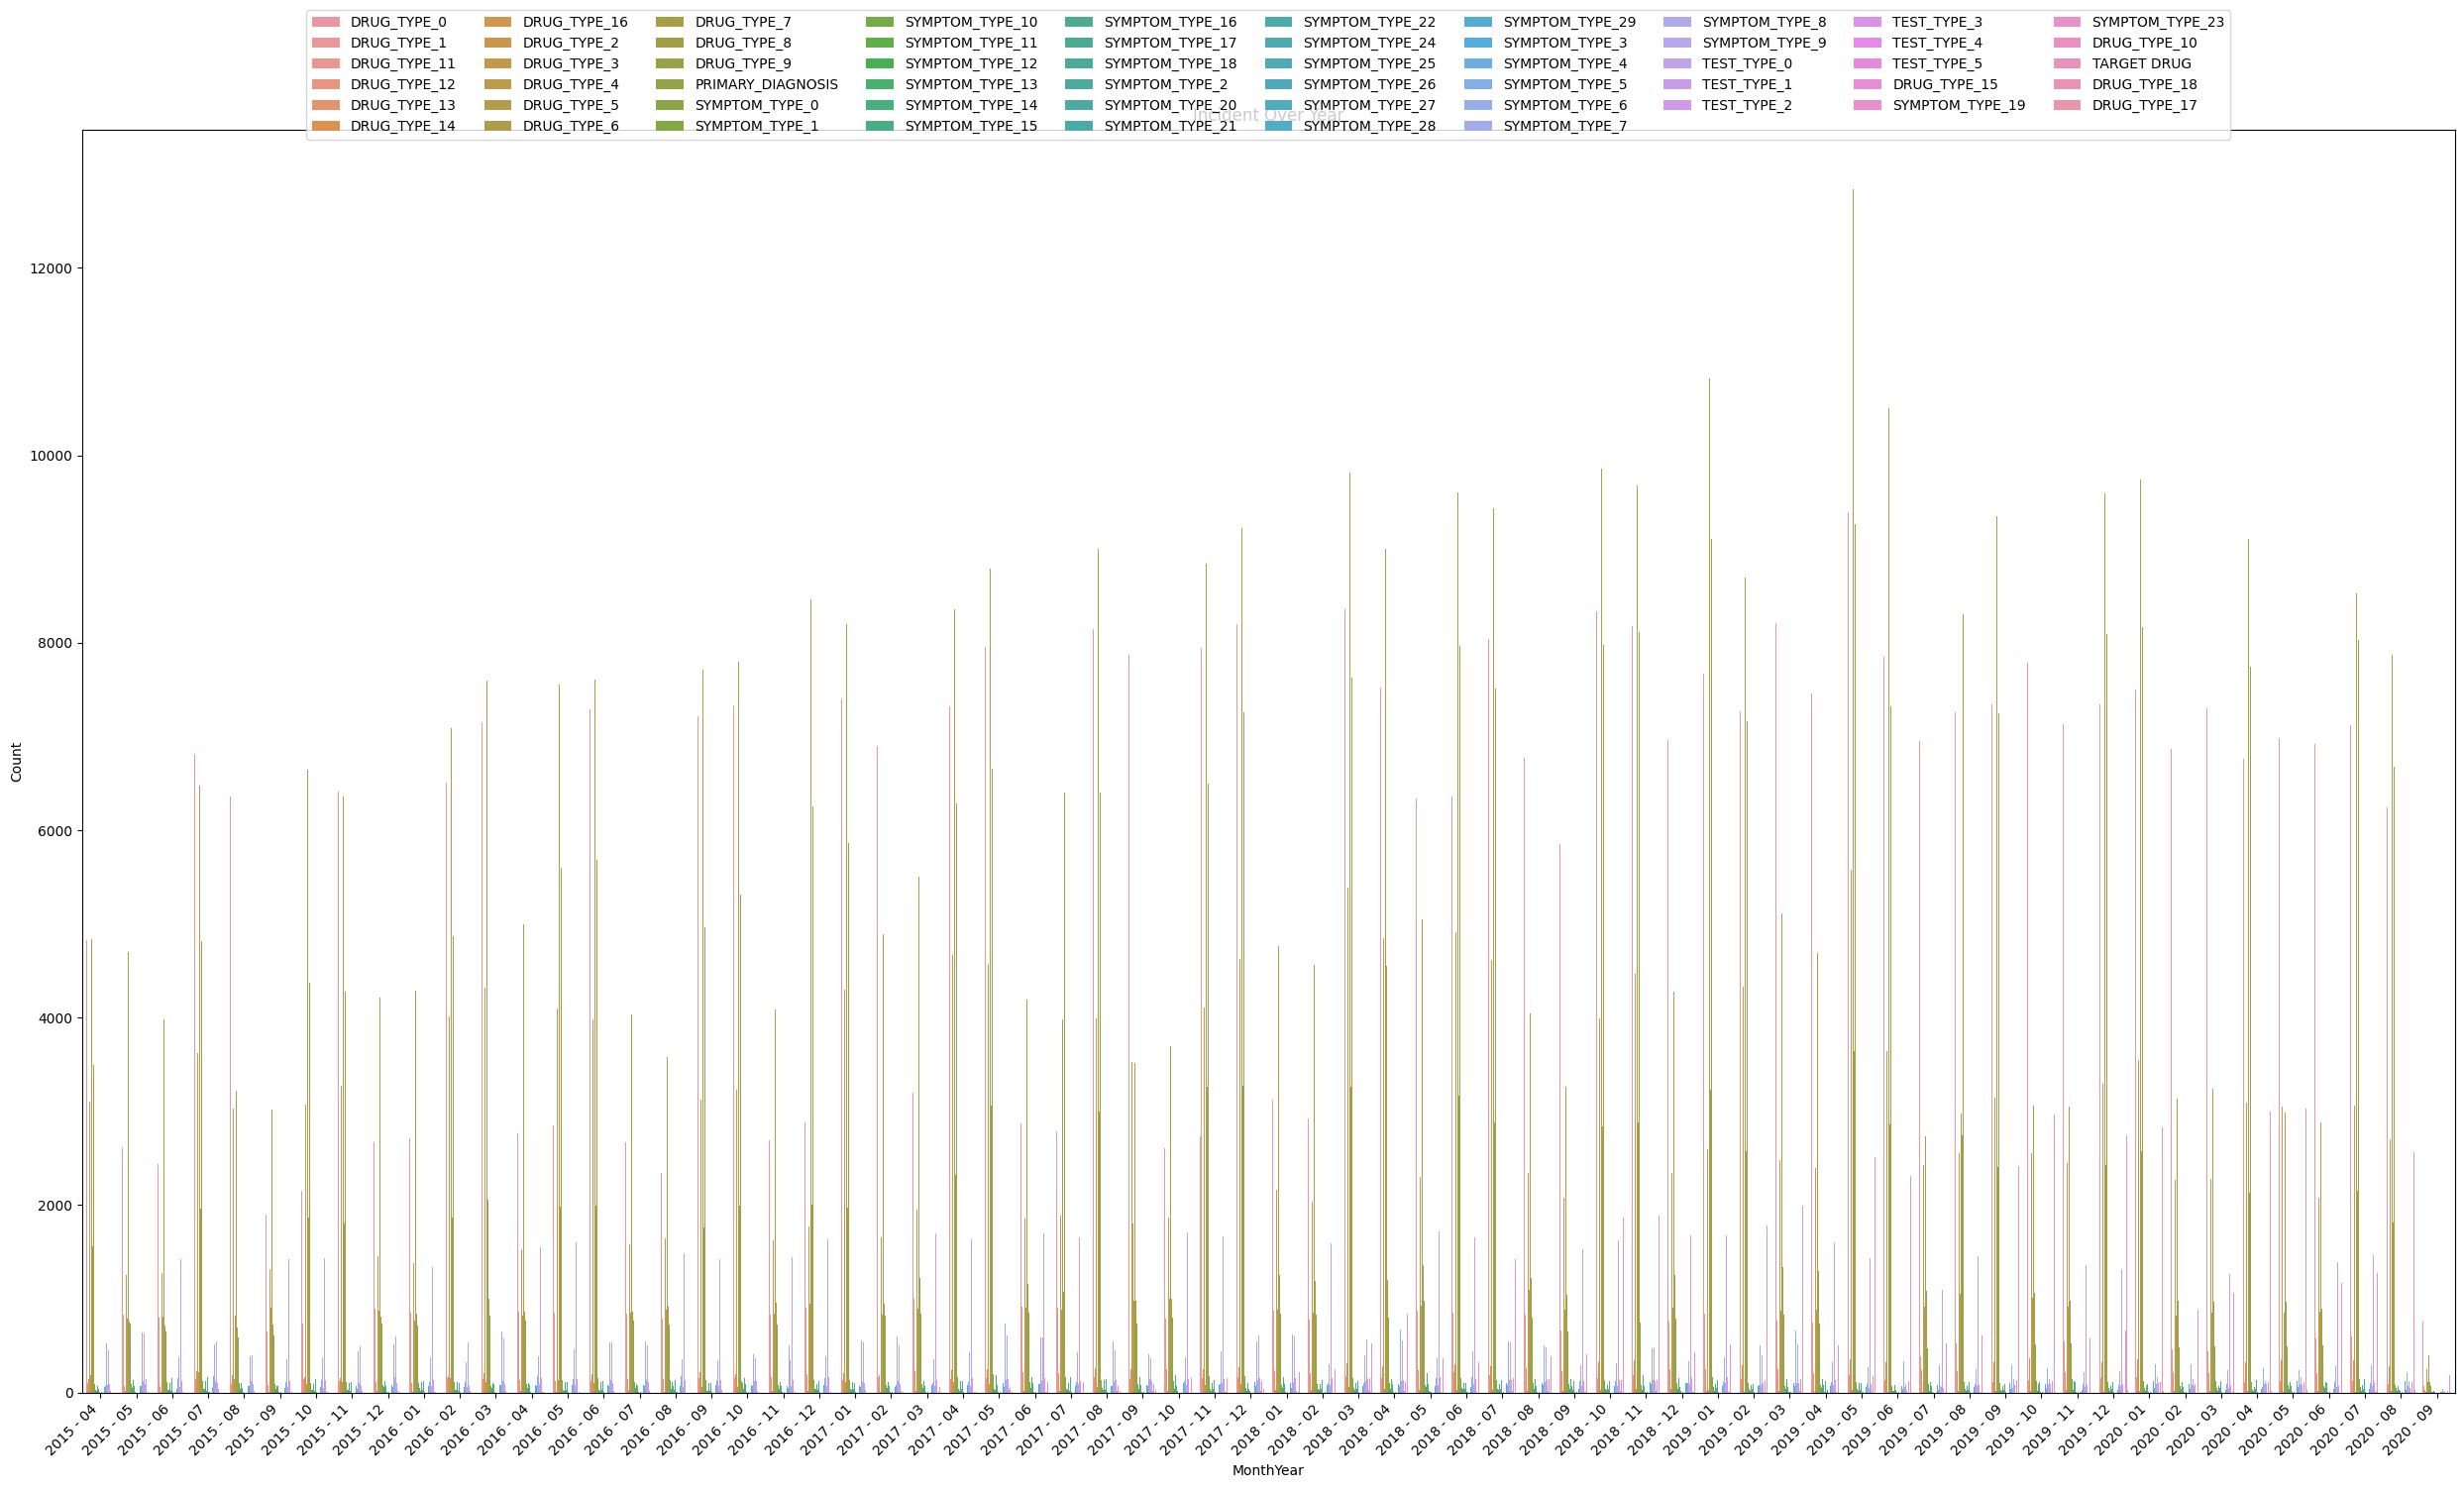

In [ ]:
# Creating Barplot with Both month and year
Incident_month_year['MonthYear'] =  Incident_month_year.apply(lambda row: f"{row['year']} - {row['month']:02d}", axis=1)

plt.figure(figsize=(25,15))
plt.title('Incident Over Year')
plt.xlabel('year')
plt.ylabel('Incident Count')
ax=sns.barplot(data = Incident_month_year, x='MonthYear', y='Count', hue='Incident')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=10)
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

From this plot year 2019 more patients are consumed the Drug

In [ ]:
df.columns

Index(['Patient-Uid', 'Date', 'Incident', 'month', 'year'], dtype='object')

In [ ]:
# copy the dataset
df1 = df.copy()
df1

,Patient-Uid,Date,Incident,month,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,3,2019
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,5,2015
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,1,2018
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,4,2015
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,6,2016
...,...,...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6,7,2018
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6,12,2017
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10,10,2018
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6,9,2015


In [ ]:
# making pivot table
# Patient with Incident

pivot_df1= df1.pivot_table(index= 'Patient-Uid', columns='Incident', values='Date' , aggfunc='count', fill_value=0)
pivot_df1

Incident,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,0,...,1,0,0,0,10,2,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,0,...,0,0,0,0,3,2,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,0,...,5,6,0,0,9,27,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,48,9,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,20,23,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,8,48,0,3,0,0,0,0,0,0,...,0,0,0,3,0,3,0,0,0,0


In [ ]:
df2 = df.copy()

In [ ]:
# extracting data from date column for unique patient ID
# for that deleting Incident column
df2.drop('Incident', axis=1)

,Patient-Uid,Date,month,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,3,2019
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,5,2015
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,1,2018
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,4,2015
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,6,2016
...,...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,7,2018
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,12,2017
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,10,2018
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,9,2015


In [ ]:
# creating a default dictionary to store the data
data_dict={}

# Loop through original data and updating the dictionary
for index, row in df2.iterrows():
  year_week = f"{row['Date'].year}-{row['Date'].week:02d}"
  if row['Patient-Uid'] not in data_dict:
    data_dict[row['Patient-Uid']] = {'Patient-Uid' : row['Patient-Uid']}
  data_dict[row['Patient-Uid']][year_week] = 1

week_data = list(data_dict.values())
week_df = pd.DataFrame(week_data)

# Fill missing values with 0
week_df = week_df.fillna(0)


In [ ]:
# creating week wise column
week_df

,Patient-Uid,2019-10,2020-32,2020-16,2019-52,2018-47,2019-08,2019-12,2018-48,2019-05,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
# Merge the pivot and week datas
merged_df = pd.merge(pivot_df1,week_df, on='Patient-Uid', how='inner')
merged_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,48,9,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,20,23,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,8,48,0,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,7,44,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
# create the TARGET column
merged_df['TARGET'] = merged_df['TARGET DRUG'].apply(lambda x:1 if isinstance(x,int) and x!=0 else 0)

In [ ]:
merged_df['TARGET'].value_counts()

0    17659
1     9374
Name: TARGET, dtype: int64

In [ ]:
merged_df.drop('TARGET DRUG', axis = 1, inplace= True)

# **Preprocessing the data**

In [ ]:
# creting data set for train, test split
x_table = merged_df.copy()

In [ ]:
x_table.drop(['TARGET', 'Patient-Uid'], axis= 1, inplace = True)
x_table

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
0,29,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,27,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,7,0,10,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,42,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,45,0,24,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,48,9,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
27029,20,23,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
27030,8,48,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27031,7,44,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
y_table = merged_df['TARGET']
y_table

0        0
1        0
2        0
3        0
4        0
        ..
27028    1
27029    1
27030    1
27031    1
27032    1
Name: TARGET, Length: 27033, dtype: int64

In [ ]:
highest_value = x_table.max().max()
highest_value

1358.0

To reduce the model complexity and data spread we need to scale the vales between 0 to 1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_table,y_table, train_size= 0.8, random_state = 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create copies of the original DataFrames
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create a MinMaxScaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform X_train using the scaler
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled[X_test.columns] = scaler.transform(X_test)


In [ ]:
X_train_scaled.max().max()

1.0

In [ ]:
X_train_scaled

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,2016-02,2016-39,2020-24,2018-41,2015-37,2019-33,2016-53,2019-16,2020-14,2020-19
24951,0.037736,0.015385,0.000000,0.010309,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5087,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
220,0.283019,0.215385,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
19846,0.012579,0.107692,0.111111,0.000000,0.072993,0.028169,0.0,0.115385,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24856,0.062893,0.207692,0.000000,0.061856,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20691,0.075472,0.100000,0.138889,0.010309,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5699,0.006289,0.230769,0.000000,0.113402,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
10742,0.075472,0.069231,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16921,0.025157,0.107692,0.000000,0.010309,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


MODEL BUILDING:

Buliding model in TensorFlow/Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(340,), activation = 'sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros')
])

model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
676/676 [==============================] - 6s 3ms/step - loss: 27.4761 - accuracy: 0.3450
Epoch 2/100
676/676 [==============================] - 2s 3ms/step - loss: 4.6264 - accuracy: 0.4881
Epoch 3/100
676/676 [==============================] - 3s 4ms/step - loss: 0.5736 - accuracy: 0.7220
Epoch 4/100
676/676 [==============================] - 2s 3ms/step - loss: 0.5581 - accuracy: 0.7318
Epoch 5/100
676/676 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.7403
Epoch 6/100
676/676 [==============================] - 2s 3ms/step - loss: 0.5312 - accuracy: 0.7484
Epoch 7/100
676/676 [==============================] - 2s 3ms/step - loss: 0.5189 - accuracy: 0.7573
Epoch 8/100
676/676 [==============================] - 2s 3ms/step - loss: 0.5087 - accuracy: 0.7587
Epoch 9/100
676/676 [==============================] - 3s 4ms/step - loss: 0.4988 - accuracy: 0.7636
Epoch 10/100
676/676 [==============================] - 2s 3ms/step - loss: 0.4916 - accur

Initially I gave 5000 epochs. But the Accuracy of the model have not imporved more than 80. so I reduced the epochs to 100 with same accuracy.

In [ ]:
model.evaluate(X_test_scaled,y_test)

169/169 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.7879


[0.46019312739372253, 0.7878676056861877]

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

169/169 [==============================] - 0s 2ms/step


array([[0.07183251],
       [0.20914307],
       [0.2834783 ],
       ...,
       [0.09522195],
       [0.02572215],
       [0.02945176]], dtype=float32)

In [ ]:
coef, intercept = model.get_weights()
coef, intercept

(array([[-5.68870401e+00],
        [-3.58770347e+00],
        [ 3.31259429e-01],
        [ 2.07251668e+00],
        [-1.10613751e+00],
        [-7.96416879e-01],
        [-6.45352125e+00],
        [ 9.05615151e-01],
        [-1.32957506e+00],
        [-7.66309381e-01],
        [-1.15965664e+00],
        [ 8.40311718e+00],
        [ 2.38812470e+00],
        [-1.16766186e+01],
        [-5.09628725e+00],
        [-5.24945593e+00],
        [-1.39303458e+00],
        [-6.34512949e+00],
        [-8.88048768e-01],
        [ 1.77193069e+01],
        [ 1.50288105e+00],
        [ 1.18532217e+00],
        [-5.11279917e+00],
        [-1.72635108e-01],
        [-3.40557718e+00],
        [-8.07706237e-01],
        [-3.91446662e+00],
        [-1.42641008e+00],
        [-2.85127544e+00],
        [-2.75850344e+00],
        [-6.85374975e-01],
        [ 1.49792477e-01],
        [-4.65929300e-01],
        [-1.10054779e+00],
        [-2.87829542e+00],
        [ 2.26914549e+00],
        [-1.23784482e+00],
 

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
print("F1 score:", f1)

F1 score: 0.6619510757441792


Both Logistic regression and Neural network (multilayer perceptron MLP) have given F1 score 65 to 70 only.

In [ ]:
df_new = df.copy()
df_new

,Patient-Uid,Date,Incident,month,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,3,2019
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,5,2015
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,1,2018
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,4,2015
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,6,2016
...,...,...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6,7,2018
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6,12,2017
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10,10,2018
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6,9,2015


In [ ]:
df_new.duplicated().sum()

35571

In [ ]:
df_new.drop_duplicates()

,Patient-Uid,Date,Incident,month,year
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,3,2019
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,5,2015
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,1,2018
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,4,2015
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,6,2016
...,...,...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6,7,2018
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6,12,2017
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10,10,2018
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6,9,2015


**Future Reference:**

Method 1 - Generate batches organized by Patient-Uid, sorted in chronological order based on the date.



Method 2 - Achieving data balance is crucial in this scenario, where we have 27,033 patients, but only 9,374 of them are currently using the Target Drug. This imbalance raises concerns about the potential for overfitting.

# Conclusion:

* To address the issue of model complexity due to a large number of columns, I generated weekly data by extracting information from the date column spanning several years.

* By organizing the data into date-wise columns, we can enhance the precision of our predictions.

* In the first scenario, we aim to predict a patient's eligibility for the "Target Drug" within the next 30 days. Implementing date-wise predictions will likely yield more accurate results for this particular task.

* In this model, I have structured the data on a weekly basis. Therefore, we can determine a patient's eligibility for the "TARGET DRUG" based on whether they have not taken the drug in the past 4 weeks. This approach allows us to make informed decisions regarding the "TARGET DRUG" eligibility.